# Classification with Bank Data
<b>Goal:</b> Using the bank-additional-full.csv file, correctly predict whether or not a customer will subscribe to a loan deposit.

## Descriptive information for the study and the dataset:
<b>Link:</b> http://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
<br><b>Study Implications:</b> There are two datasets containing all the instances. bank-full.csv is the chosen one to develop our model since it focuses on information which is less dependent on macro-economic factors. The reasoning behind this is that macro-economic factors will likely dictate how much the bank should scale up or down marketing spend, but it should not be the basis for determining who should be included in the target market. Macro-economic factors are relatively unpredictable and shouldn't necessarily be the basis of developing a target market in any company's overall marketing strategy. Instead, for the purposes of this study, only personal demographic information is used. Furthermore, other demographic information, like 'job' and 'loan,' may be sufficient in reflecting the current implications of the macro-environment on the individual at the micro-level, which is what this study focuses on. In a regression model, the macro-level factors for social and economic context would be included. The ultimate implication of this classification study is to determine which customers are most likely to subscribe to a loan deposit, and therefore how the company ought to select its target market, and how to position its loan products to that cohort. Ultimately, this study will aid the bank in developing it's marketing strategy including decisions related to product, price, place, and promotions. <br>
<br>
<br>
### Data Description: 
#### Input Variables:
><b>Demographic Variables:</b> <br>
>1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue- collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
><b>Last Contact from the Current Campaign Variables:</b> <br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
><b>Other Attribute Variables:</b> <br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<br>
#### Output variable (Target Variable):
>16 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>

#### Omitted Variables:
><b>Social and Economic Context Variables:</b> <br>
> - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
> - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
> - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
> - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
> - nr.employed: number of employees - quarterly indicator (numeric) <br>
<br>


## What is a term deposit?
>A term deposit is a hybrid bank account and investment account. It is similar to a bond which yields a relatively low interest rate, but normally has short maturity dates compared to bonds, thereby making them more accessable as cash in the near future. Term deposits will normally mature between one month and a couple years while some bonds can mature in decades. The best example of a term deposit is a CD, or Certificate of Deposit. These instruments are very useful for banks because they provide more dependability of deposits.
### Why is dependability of deposits important for banks?
>Have you ever heard of a run on a bank? The Great Depression of the early 1900's was partly caused by a nationwide financial scare where everyone was trying to get their money out of the banking system at once. This was detrimental to banks, and is an issue which modern day bank regulators (OCC, Federal Reserve, and local authorities) scrutinize heavily to prevent such economic fallout from ever occurring again. Banks must keep a sufficient amount of money in reserves for both bad loan expenses (defaults) and to meet the withdrawal needs of their customers, or depositors. If there are not sufficient reserves in a bank to meet both of those requirements, and other expenses of the bank, then that bank could fail. So, besides just simply holding a sufficient amount of cash in reserves with cushion, banks can also use term deposits to ensure that those reserves are more stable. Higher quality deposits are an effective means of reducing the overall risk of a bank's loan portfolio, or balance sheet. Essentially, term deposits offer higher rates to depositors, but the catch is that the term deposit cannot be withdrawn for a period of time. If it is withdrawn early, there will be a penalty imposed. In conclusion, term deposits, or CDs, are an important way for banks to reduce risk, and it is important for them to effectively target customers who may be interested in such securities. 

### Locate bank-additional-full.csv in working directory:

In [1]:
#pip install os_sys

In [2]:
import os
cwd = os.getcwd()
print(cwd)

/Users/jordandick/Documents/6341 - Applied ML/project 2


### List of files in current working directory:

In [3]:
os.listdir()

['rough_final_Project2_Regression_Group4_Gautam_Dick.ipynb',
 'Financial_Service_Marketing_ML_Classification.ipynb',
 '.DS_Store',
 'Project2_Regression_Group4_Gautam_Dick.ipynb',
 'Intermediate-Project2_Regression_Group4_Gautam_Dick.ipynb',
 'Financial_Service_Marketing_Classification.ipynb',
 'bank_data_new.csv',
 'Project2_Classification_Group4_Gautam_Dick.ipynb',
 'Project2_Group08_Zhang_ShahabiNejad',
 '.ipynb_checkpoints',
 'Almost_done_Classification_Project2.ipynb',
 'bank-additional-full.csv',
 'AB_NYC_2019.csv',
 'Project2_Group08_Zhang_ShahabiNejad.zip']

### Exploratory Analysis of original bank-additional-full.csv:

In [4]:
import pandas as pd
df = pd.read_csv(str(cwd)+'/'+'bank-additional-full.csv', sep=';', header=0)
type(df)

pandas.core.frame.DataFrame

In [5]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
df=df.sample(20000)

In [7]:
# delete this 
#df=df.sample(500)




> drop macro-related variables

In [8]:
macro_lst = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

for i in macro_lst:
    df.drop([i], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          20000 non-null  int64 
 1   job          20000 non-null  object
 2   marital      20000 non-null  object
 3   education    20000 non-null  object
 4   default      20000 non-null  object
 5   housing      20000 non-null  object
 6   loan         20000 non-null  object
 7   contact      20000 non-null  object
 8   month        20000 non-null  object
 9   day_of_week  20000 non-null  object
 10  duration     20000 non-null  int64 
 11  campaign     20000 non-null  int64 
 12  pdays        20000 non-null  int64 
 13  previous     20000 non-null  int64 
 14  poutcome     20000 non-null  object
 15  y            20000 non-null  object
dtypes: int64(5), object(11)
memory usage: 2.6+ MB


# Practice with data imputation strategies

>none of the data is nan, so 5% of the values will be randomly imputed as np.nan values

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score

>set random seed for reproducibility

In [10]:
np.random.seed(100)

In [11]:
nan_mat = np.random.random(df.shape)<0.05
nan_mat.shape

(20000, 16)

In [12]:
# of nans
n = nan_mat.sum()
n

16058

In [13]:
# approximately 5% of the dataset will be set to nan
n/(41188*16)

0.024366927260367096

In [14]:
dfn = df.mask(nan_mat)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          19000 non-null  float64
 1   job          18989 non-null  object 
 2   marital      18998 non-null  object 
 3   education    18993 non-null  object 
 4   default      18991 non-null  object 
 5   housing      18998 non-null  object 
 6   loan         19035 non-null  object 
 7   contact      18971 non-null  object 
 8   month        19068 non-null  object 
 9   day_of_week  18991 non-null  object 
 10  duration     18942 non-null  float64
 11  campaign     18956 non-null  float64
 12  pdays        19051 non-null  float64
 13  previous     18991 non-null  float64
 14  poutcome     18962 non-null  object 
 15  y            19006 non-null  object 
dtypes: float64(5), object(11)
memory usage: 2.6+ MB


In [15]:
# 5% of new data frame is nan

nnan = dfn.isnull().sum().sum()
ntot = dfn.shape[1]*dfn.shape[0]
percent_nan = nnan/ntot

print(percent_nan)

0.05018125


### Export new copy of data with 5% NaN
><b>Named:</b> bank_data_new.csv

In [16]:
dfn.to_csv('bank_data_new.csv')

# Data Preprocessing and Preparation for ML Classification Algorithms:

In [17]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          19000 non-null  float64
 1   job          18989 non-null  object 
 2   marital      18998 non-null  object 
 3   education    18993 non-null  object 
 4   default      18991 non-null  object 
 5   housing      18998 non-null  object 
 6   loan         19035 non-null  object 
 7   contact      18971 non-null  object 
 8   month        19068 non-null  object 
 9   day_of_week  18991 non-null  object 
 10  duration     18942 non-null  float64
 11  campaign     18956 non-null  float64
 12  pdays        19051 non-null  float64
 13  previous     18991 non-null  float64
 14  poutcome     18962 non-null  object 
 15  y            19006 non-null  object 
dtypes: float64(5), object(11)
memory usage: 2.6+ MB


### Data Imputations:

> Strategy for imputing age values:

In [18]:
a = pd.DataFrame(dfn.groupby(dfn['job']).agg(pd.Series.mode))
a

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,
admin.,32,married,university.degree,no,yes,no,cellular,may,fri,72,1.0,999.0,0.0,nonexistent,no
blue-collar,36,married,basic.9y,no,yes,no,cellular,may,"[mon, wed]","[36.0, 119.0, 136.0]",1.0,999.0,0.0,nonexistent,no
entrepreneur,36,married,university.degree,no,yes,no,cellular,may,thu,85,1.0,999.0,0.0,nonexistent,no
housemaid,"[36.0, 39.0]",married,basic.4y,no,yes,no,cellular,may,tue,"[66.0, 86.0, 126.0, 135.0]",1.0,999.0,0.0,nonexistent,no
management,43,married,university.degree,no,yes,no,cellular,may,mon,"[121.0, 175.0]",1.0,999.0,0.0,nonexistent,no
retired,58,married,basic.4y,no,yes,no,cellular,may,wed,188,1.0,999.0,0.0,nonexistent,no
self-employed,30,married,university.degree,no,yes,no,cellular,may,thu,"[85.0, 104.0, 139.0]",1.0,999.0,0.0,nonexistent,no
services,31,married,high.school,no,yes,no,cellular,may,thu,"[88.0, 158.0, 178.0, 185.0]",1.0,999.0,0.0,nonexistent,no
student,24,single,high.school,no,yes,no,cellular,may,tue,"[131.0, 137.0]",1.0,999.0,0.0,nonexistent,no


> check if retired, student, and unknown represent a significant number of the total dataset to justify their use in the aggregate to impute values for the age column

In [19]:
# number of housemaids
print('Number of Retirees:')
print(dfn[dfn['job']=='retired'].shape[0])
print('Number of Students:')
print(dfn[dfn['job']=='student'].shape[0])
print('Number of Unknowns:')
print(dfn[dfn['job']=='unknown'].shape[0])

Number of Retirees:
810
Number of Students:
433
Number of Unknowns:
151


> Informed Assumption: <br>
>There are a sufficient number of observations representing each of the above job descriptions to make strategic data imputations where the missing values will be replaced using the mode for each category. Another assumption is that age is perhaps one of the most valuable demographic pieces of information because it is highly ocrrelated with one's stage in life, and corresponding need for term deposit type products.

In [20]:
# impute np.nan values in age for the following observations: 
# housemaid, retired, student, unknown

for lab, cont in dfn.iterrows():
    age = cont['age']
       
    if cont['job']=='retired':age =59
        
    if cont['job']=='student':age=24
    
    if cont['job']=='unknown':age=45
    
        
    if pd.isnull(cont['age'])==True: dfn.loc[lab,'age'] = age

> impute all NaN values

In [21]:
# import the rest of the nan values in the dataset with their respective modes
colnames = dfn.columns.to_list()

for n in colnames:
    mode = dfn[n].mode()[0]
    dfn[n].fillna(mode, inplace=True)

In [22]:
dfn.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Preprocessing Data for ML Classification ALgorithms

In [23]:
dfn

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
36094,51.0,admin.,divorced,university.degree,no,no,no,cellular,may,tue,91.0,1.0,999.0,0.0,nonexistent,no
6343,32.0,blue-collar,single,high.school,no,yes,no,telephone,may,tue,72.0,2.0,999.0,0.0,nonexistent,no
15636,50.0,blue-collar,married,basic.4y,unknown,yes,yes,cellular,jul,mon,140.0,1.0,999.0,0.0,nonexistent,no
2710,50.0,management,divorced,high.school,unknown,no,no,telephone,may,wed,72.0,7.0,999.0,0.0,nonexistent,no
27236,34.0,technician,divorced,university.degree,no,no,no,cellular,nov,fri,316.0,3.0,999.0,0.0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,38.0,self-employed,single,unknown,no,no,no,cellular,jul,tue,843.0,8.0,999.0,0.0,nonexistent,no
19389,34.0,admin.,single,university.degree,unknown,no,no,cellular,aug,wed,147.0,1.0,999.0,0.0,nonexistent,no
29758,34.0,blue-collar,married,basic.9y,no,no,no,cellular,apr,mon,86.0,2.0,999.0,0.0,nonexistent,no
30138,59.0,retired,divorced,professional.course,no,yes,no,cellular,apr,thu,968.0,1.0,5.0,2.0,failure,yes


> replace categorical columns with dummy variable columns. Categorical Columns include: <br>
'job','marital','education','contact','month','day_of_week','poutcome'

In [24]:
#replace categorical columns with dummies
# columns to replace: 
# 'job','marital','education','contact','month','day_of_week'
cat_vars = ['job','marital','education','contact','month','day_of_week','poutcome']

fdf = dfn.copy()

dfdum_list=[]

for cat in cat_vars:
    temp_df = pd.DataFrame(pd.get_dummies(dfn[cat]))
    dfdum_list.append(temp_df)
    
    fdf.drop(cat, axis=1, inplace=True)

    
dfdum_list.append(fdf)

fdf = pd.concat(dfdum_list, axis=1)

In [25]:
dfdum_list

[       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
 36094       1            0             0          0           0        0   
 6343        0            1             0          0           0        0   
 15636       0            1             0          0           0        0   
 2710        0            0             0          0           1        0   
 27236       0            0             0          0           0        0   
 ...       ...          ...           ...        ...         ...      ...   
 16091       0            0             0          0           0        0   
 19389       1            0             0          0           0        0   
 29758       0            1             0          0           0        0   
 30138       0            0             0          0           0        1   
 20902       1            0             0          0           0        0   
 
        self-employed  services  student  technician  unemployed  unknown 

In [26]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               20000 non-null  uint8  
 1   blue-collar          20000 non-null  uint8  
 2   entrepreneur         20000 non-null  uint8  
 3   housemaid            20000 non-null  uint8  
 4   management           20000 non-null  uint8  
 5   retired              20000 non-null  uint8  
 6   self-employed        20000 non-null  uint8  
 7   services             20000 non-null  uint8  
 8   student              20000 non-null  uint8  
 9   technician           20000 non-null  uint8  
 10  unemployed           20000 non-null  uint8  
 11  unknown              20000 non-null  uint8  
 12  divorced             20000 non-null  uint8  
 13  married              20000 non-null  uint8  
 14  single               20000 non-null  uint8  
 15  unknown              20000 non-n

> drop unknown columns as they are less information rich

In [27]:
fdf.drop('unknown', axis=1, inplace=True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               20000 non-null  uint8  
 1   blue-collar          20000 non-null  uint8  
 2   entrepreneur         20000 non-null  uint8  
 3   housemaid            20000 non-null  uint8  
 4   management           20000 non-null  uint8  
 5   retired              20000 non-null  uint8  
 6   self-employed        20000 non-null  uint8  
 7   services             20000 non-null  uint8  
 8   student              20000 non-null  uint8  
 9   technician           20000 non-null  uint8  
 10  unemployed           20000 non-null  uint8  
 11  divorced             20000 non-null  uint8  
 12  married              20000 non-null  uint8  
 13  single               20000 non-null  uint8  
 14  basic.4y             20000 non-null  uint8  
 15  basic.6y             20000 non-n

> Replace ordinal columns with binary output. Columns to be mapped to ordinal ones include:<br>housing, loan, default

In [28]:
print('housing unique & mode')
print(fdf['housing'].unique())
hm = fdf['housing'].mode()[0]
print(hm)

print('loan unique & mode')
print(fdf['loan'].unique())
lm = fdf['loan'].mode()[0]
print(lm)

print('default unique & mode')
print(fdf['default'].unique())
dm = fdf['default'].mode()[0]
print(dm)

fdf['housing'].replace('unknown',hm, inplace=True)
fdf['loan'].replace('unknown',lm, inplace=True)
fdf['default'].replace('unknown',dm, inplace=True)

housing unique & mode
['no' 'yes' 'unknown']
yes
loan unique & mode
['no' 'yes' 'unknown']
no
default unique & mode
['no' 'unknown' 'yes']
no


In [29]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               20000 non-null  uint8  
 1   blue-collar          20000 non-null  uint8  
 2   entrepreneur         20000 non-null  uint8  
 3   housemaid            20000 non-null  uint8  
 4   management           20000 non-null  uint8  
 5   retired              20000 non-null  uint8  
 6   self-employed        20000 non-null  uint8  
 7   services             20000 non-null  uint8  
 8   student              20000 non-null  uint8  
 9   technician           20000 non-null  uint8  
 10  unemployed           20000 non-null  uint8  
 11  divorced             20000 non-null  uint8  
 12  married              20000 non-null  uint8  
 13  single               20000 non-null  uint8  
 14  basic.4y             20000 non-null  uint8  
 15  basic.6y             20000 non-n

> Convert Ordinal Columns into binary where 1/0 is yes/no, respectively.<br>
Columns to be converted: default, housing, loan, y

In [30]:
ordlst = ['default', 'housing', 'loan', 'y']

for i in ordlst:
    fdf[i].replace('yes', 1, inplace=True)
    fdf[i].replace('no', 0, inplace=True)

>Dataset's variables are now in their appropriate numeric form for ML algorithms to operate on them.

In [31]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 36094 to 20902
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admin.               20000 non-null  uint8  
 1   blue-collar          20000 non-null  uint8  
 2   entrepreneur         20000 non-null  uint8  
 3   housemaid            20000 non-null  uint8  
 4   management           20000 non-null  uint8  
 5   retired              20000 non-null  uint8  
 6   self-employed        20000 non-null  uint8  
 7   services             20000 non-null  uint8  
 8   student              20000 non-null  uint8  
 9   technician           20000 non-null  uint8  
 10  unemployed           20000 non-null  uint8  
 11  divorced             20000 non-null  uint8  
 12  married              20000 non-null  uint8  
 13  single               20000 non-null  uint8  
 14  basic.4y             20000 non-null  uint8  
 15  basic.6y             20000 non-n

## Test for Imbalance
>Before the model can be split into train and test datasets, the dataset needs to be assessed for imbalance. If the dataset is imbalanced, then it may be difficult to predict the target variable in a meaningful way using traditional scoring techniques. Another name for this type of issue in a classification model is rare event prediction. Imbalance can be expressed as a simple ratio. Technically, anything other than equal representation is considered imbalanced, but slight imbalance is not a significant problem. For our purposes, a ratio less than 0.2 will be considered imbalanced. In other words, if less than 20% of the observations in our dataset have a value of 'yes' or 1 in the target column, then the dataset will be considered significantly imbalanced and adjustments will be necessary.<br><br>
In order to adjust for imbalance, a different scoring method will be used to assess each model. The roc_auc_score method will be used because it accounts for recall and the FPR (False Positive Rate). It is important to maximize the recall in whatever model is finally selected because it will ensure that a sufficient number of the most likely customers to subscribe to a term deposit are marketed to. The recall measures how many out of all of the positive target variables are correctly calssified. Also, we want to minimize the FPR because it wastes the bank's money too market to those who are unlikely to subscribe to a term deposit.


In [32]:
n_of_y = list(fdf['y']).count(1)
tot = fdf.shape[0]
ratio_of_y = n_of_y/tot
print('Total number of y in fbf dataset:')
print(n_of_y)
print()
print('Ratio of y in the target column in fbf dataframe:')
print(ratio_of_y)

Total number of y in fbf dataset:
2141

Ratio of y in the target column in fbf dataframe:
0.10705


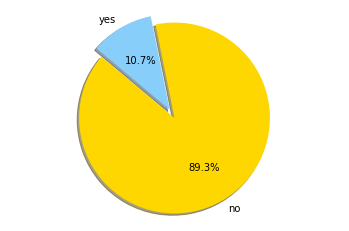

In [33]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'no','yes'
num_no = list(fdf['y']).count(0)
num_yes = list(fdf['y']).count(1)
sizes = [num_no,num_yes]
colors = ['gold','lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

> This dataset is significantly imbalanced, so adjustments will have to be made. Specifically, the scoring method used throughout this notebook for each classification model will be the roc_auc_score method in the sklearn package. This scoring method aims to maximize the recall, while minimizing the false positive rate. The interpretation of this for the bank is that this new scoring function will aim to minimize the number of customers who are marketed to who are unlikely to subscribe to a term deposit.

#### Train/Test data split
>The data will be split into train and test datasets that will be used for all of the models. <br><br>
<b>Regularization:</b><br>
Importantly, the MinMaxScaler() function will be applied to the data at the same time as the train/test split. The MinMaxScaler() function is a commonly used regularization function which transforms all variables in each column to a value between 0-1 relative to other values in that variable. Regularization is applied to ensure that every factor in the dataset is weighed equally when distance-based classification models are applied. In models like support vector machines, the distance between points matters as that is the technique used to classify the data. Furthermore, Regularization will not affect non-distance-based calssification models. Therefore, standardization of the data is a critical first step regardless of whether classification or regression models are employed. 

In [95]:
y = fdf['y']
#y

In [ ]:
y

In [96]:
x = fdf.drop('y', axis=1)
#x

In [97]:
x

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,nonexistent,success,age,default,housing,loan,duration,campaign,pdays,previous
36094,1,0,0,0,0,0,0,0,0,0,...,1,0,51.0,0,0,0,91.0,1.0,999.0,0.0
6343,0,1,0,0,0,0,0,0,0,0,...,1,0,32.0,0,1,0,72.0,2.0,999.0,0.0
15636,0,1,0,0,0,0,0,0,0,0,...,1,0,50.0,0,1,1,140.0,1.0,999.0,0.0
2710,0,0,0,0,1,0,0,0,0,0,...,1,0,50.0,0,0,0,72.0,7.0,999.0,0.0
27236,0,0,0,0,0,0,0,0,0,1,...,1,0,34.0,0,0,0,316.0,3.0,999.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,0,0,0,0,0,0,1,0,0,0,...,1,0,38.0,0,0,0,843.0,8.0,999.0,0.0
19389,1,0,0,0,0,0,0,0,0,0,...,1,0,34.0,0,0,0,147.0,1.0,999.0,0.0
29758,0,1,0,0,0,0,0,0,0,0,...,1,0,34.0,0,0,0,86.0,2.0,999.0,0.0
30138,0,0,0,0,0,1,0,0,0,0,...,0,0,59.0,0,1,0,968.0,1.0,5.0,2.0


>The dependent variables and the target variable columns have been separated into two datasets. When the data is split into train/test sets, observations will be randomly selected for each, therefore ensuring the train/test datasets accurately represent the original dataset.

## Spliting the data into train and test part

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 0)

scaler = preprocessing.MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

>Data has now been preprocessed and is ready for ML Classification Algorithms.

In [37]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


* Firstly we will use Voting Classififier algorithms

# Voting classifiers (hard)

In [38]:
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

log_clf = LogisticRegression(solver='liblinear', random_state=0)
log_clf.fit(x_train,y_train)

linsvc = LinearSVC(random_state=0)
linsvc.fit(x_train,y_train)

svcr = SVC(kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

svcp = SVC(kernel='poly', random_state=0)
svcp.fit(x_train,y_train)

lsvc = SVC(kernel='linear', random_state=0)
lsvc.fit(x_train,y_train)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

## ROC_AUC score of hard votingclassifier compared to individual model

In [39]:
voting_clf = VotingClassifier(estimators=[('log_clf', log_clf),('linsvc',linsvc),
                               ('knn_clf', knn_clf),('lsvc_clf',lsvc),('svcr', svcr),('svcp',svcp), ('tree',tree)],voting='hard')
voting_clf.fit(x_train, y_train)
voting_clf.fit(x_train, y_train)
algo=[]
score=[]

from sklearn.metrics import accuracy_score
for clf in (log_clf,linsvc, knn_clf, lsvc,svcr, svcp,tree,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print((clf.__class__.__name__), roc_auc_score(y_test, y_pred))
    algo.append(clf)
    score.append(roc_auc_score(y_test, y_pred))  
    

LogisticRegression 0.6172299184819934
LinearSVC 0.6129890647362618
KNeighborsClassifier 0.5795440034900035
SVC 0.5954377388451004
SVC 0.590296187058387
SVC 0.5963259495697717
DecisionTreeClassifier 0.6747005763097885
VotingClassifier 0.5979021711414897


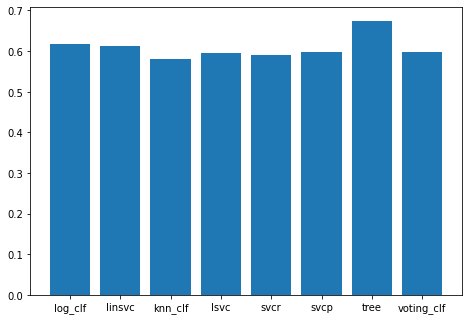

In [40]:
algo=['log_clf','linsvc', 'knn_clf', 'lsvc', 'svcr', 'svcp','tree','voting_clf']
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algo,score)
plt.show()

## Soft voting classifiers  


In [41]:
from sklearn.ensemble import VotingClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train,y_train)

log_clf = LogisticRegression(solver='liblinear', random_state=0)
log_clf.fit(x_train,y_train)

lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train,y_train)

svcr = SVC(probability=True,kernel='rbf', random_state=0)
svcr.fit(x_train,y_train)

svcp = SVC(probability=True,kernel='poly')
svcp.fit(x_train,y_train)

lsvc = SVC(probability=True,kernel='linear', random_state=0)
lsvc.fit(x_train,y_train)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)


DecisionTreeClassifier(random_state=0)

## ROC AUC socre of soft votingclassifier compared to individual model

In [42]:

voting_clf = VotingClassifier(estimators=[('log_clf', log_clf), ('knn_clf', knn_clf),('lsvc',lsvc),('svcr', svcr),('svcp',svcp),
                                          ('tree',tree)], voting='soft')
voting_clf.fit(x_train, y_train)

score1=[]
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, lsvc,svcr, svcp,tree,voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    score1.append(roc_auc_score(y_test, y_pred))




LogisticRegression 0.6172299184819934
KNeighborsClassifier 0.5795440034900035
SVC 0.5954377388451004
SVC 0.590296187058387
SVC 0.5963259495697717
DecisionTreeClassifier 0.6747005763097885
VotingClassifier 0.5993595617999298


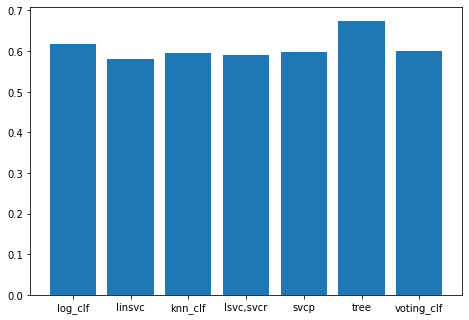

In [43]:
algo=['log_clf','linsvc', 'knn_clf', 'lsvc,svcr', 'svcp','tree','voting_clf']
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algo,score1)
plt.show()

* From the bar diagram, we can see that individual decision tree have high ROC AUC score than soft voting classifier

## Bagging classifier on LinearSVC

In [44]:
from sklearn.ensemble import BaggingClassifier

lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train,y_train)


bag_clf = BaggingClassifier(lsvc, random_state=0,n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)

BaggingLinearSVC=grid_search.best_score_
BaggingLinearSVC

0.8857314096724549

## Bagging classifier on DecisionTreeClassifier

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# next euta model, 2nd perform garne choose garera

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

bag_clf = BaggingClassifier(tree, random_state=0, n_jobs=-1)

param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')
grid_search.fit(x_train,y_train)
BaggingDecisionTreeClassifier=grid_search.best_score_
BaggingDecisionTreeClassifier

0.8422130104818379

## Pasting  on LinearSVC

In [46]:
from sklearn.ensemble import BaggingClassifier

lsvc = LinearSVC(random_state=0)
lsvc.fit(x_train,y_train)


bag_clf = BaggingClassifier(lsvc, random_state=0,bootstrap=False, n_jobs=-1)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
PastingLinearSVC=grid_search.best_score_
PastingLinearSVC

0.8869204754565194

## Pasting  on DecisionTreeClassifier

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)


bag_clf = BaggingClassifier(tree, random_state=0, n_jobs=-1,bootstrap=False,)


param_grid = {'max_samples': [0.01,0.05,0.1,0.5,1],

              'max_features': [0.01,0.05,0.1,0.5,1]}

grid_search = GridSearchCV(bag_clf, param_grid, cv=5,scoring = 'roc_auc')

grid_search.fit(x_train,y_train)
PastingDecisionTreeClassifier=grid_search.best_score_
PastingDecisionTreeClassifier

0.8425867935876339

## Adaboast on DecisionTreeClassifier

In [48]:
# adaboast in decision tree

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score


ada_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)
AdaboastDecisionTreeClassifier=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))


(1.0, 0.6733682602227817)

## Adaboast on linear SVC

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LinearSVC(random_state=0), n_estimators=200, algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(x_train, y_train)

AdaboastlinearSVC=roc_auc_score(y_train, ada_clf.predict(x_train))
roc_auc_score(y_train, ada_clf.predict(x_train)),roc_auc_score(y_test, ada_clf.predict(x_test))

(0.6217340840153018, 0.6156474532521201)

# Gradient Bosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

Gradient_Bosting=roc_auc_score(y_train, gbrt.predict(x_train))
roc_auc_score(y_train, gbrt.predict(x_train)),roc_auc_score(y_test, gbrt.predict(x_test))

(0.6879014999380986, 0.6547720279280843)

([<matplotlib.axis.YTick at 0x7fc9258d7430>,
 [Text(0, 0, 'admin.'),
  Text(0, 0, 'blue-collar'),
  Text(0, 0, 'entrepreneur'),
  Text(0, 0, 'housemaid'),
  Text(0, 0, 'management'),
  Text(0, 0, 'retired'),
  Text(0, 0, 'self-employed'),
  Text(0, 0, 'services'),
  Text(0, 0, 'student'),
  Text(0, 0, 'technician'),
  Text(0, 0, 'unemployed'),
  Text(0, 0, 'divorced'),
  Text(0, 0, 'married'),
  Text(0, 0, 'single'),
  Text(0, 0, 'basic.4y'),
  Text(0, 0, 'basic.6y'),
  Text(0, 0, 'basic.9y'),
  Text(0, 0, 'high.school'),
  Text(0, 0, 'illiterate'),
  Text(0, 0, 'professional.course'),
  Text(0, 0, 'university.degree'),
  Text(0, 0, 'cellular'),
  Text(0, 0, 'telephone'),
  Text(0, 0, 'apr'),
  Text(0, 0, 'aug'),
  Text(0, 0, 'dec'),
  Text(0, 0, 'jul'),
  Text(0, 0, 'jun'),
  Text(0, 0, 'mar'),
  Text(0, 0, 'may'),
  Text(0, 0, 'nov'),
  Text(0, 0, 'oct'),
  Text(0, 0, 'sep'),
  Text(0, 0, 'fri'),
  Text(0, 0, 'mon'),
  Text(0, 0, 'thu'),
  Text(0, 0, 'tue'),
  Text(0, 0, 'wed'),
  Te

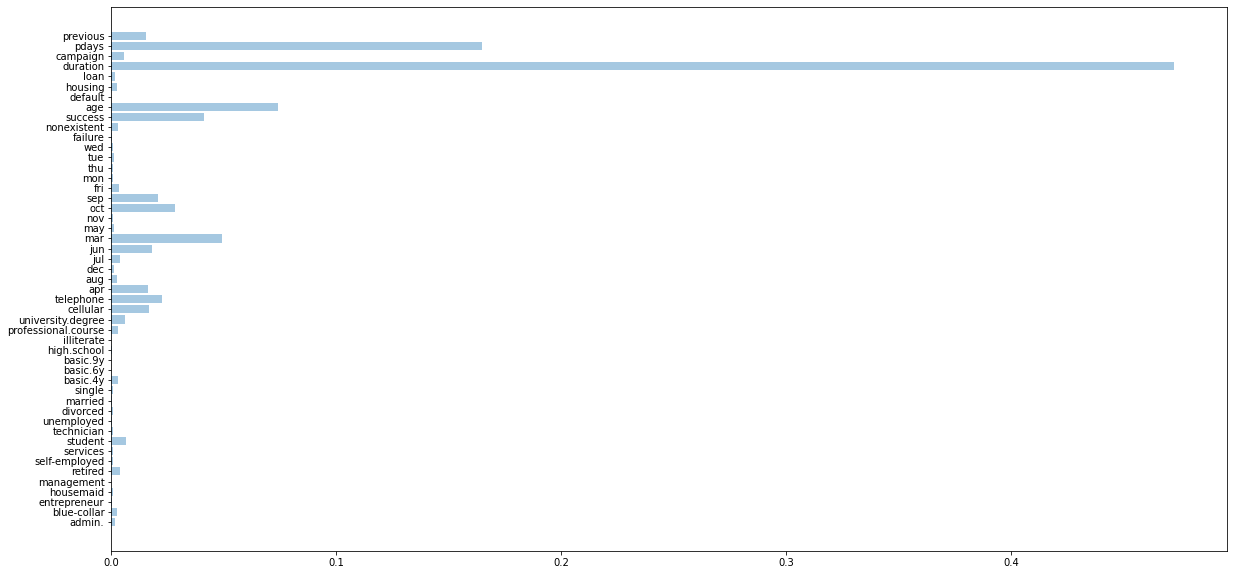

In [51]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = x.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

* The results of above algorithms are presented in the table below

In [52]:
a=['BaggingLinearSVC','BaggingDecisionTreeClassifier','PastingLinearSVC','PastingDecisionTreeClassifier','AdaboastDecisionTreeClassifier','AdaboastlinearSVC','Gradient_Bosting']
b=(BaggingLinearSVC,BaggingDecisionTreeClassifier,PastingLinearSVC,PastingDecisionTreeClassifier,AdaboastDecisionTreeClassifier,AdaboastlinearSVC,Gradient_Bosting)
ab=pd.DataFrame(b,a)
ab.columns=['Training_ROC_AUC']
ab

,Training_ROC_AUC
BaggingLinearSVC,0.885731
BaggingDecisionTreeClassifier,0.842213
PastingLinearSVC,0.886920
PastingDecisionTreeClassifier,0.842587
AdaboastDecisionTreeClassifier,1.000000
AdaboastlinearSVC,0.621734
Gradient_Bosting,0.687901


* Although these models gave us really high ROC_AUC, but these models are overfiitted and perform really bad in test dataset

# Reducing data with PCA

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
pca = PCA(n_components=0.95)
scaler=MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [55]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


## Classification Models:
##### Models Used: 
>KNN classification, Logistic Regression, Linear Support Vector Machine (SVM), Kernelized Support Vector Machine (rbf, poly, and linear), and Decision Tree Classifier. <br> <br>
>Intermediate models will be chosen based on maximizing the test scores.

* Now we will run all the individual classification model using reduced data from PCA

### KNN Classification

In [56]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#best implementation
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [5, 10, 15, 20, 30, 40, 50]}
knn_grid = GridSearchCV(knn, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
knn_grid.fit(x_train, y_train) #imbalance X_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='roc_auc')

In [57]:
knn_grid.best_params_

{'n_neighbors': 50}

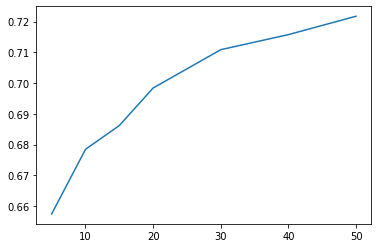

In [58]:
a=knn_grid.cv_results_
y=a['mean_test_score']
x=[5, 10, 15, 20, 30, 40, 50]
plt.plot(x,y)

* From the figure as well, we can see the best param is when k=50

In [59]:
knn_grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20, 30, 40, 50]},
             scoring='roc_auc')>

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [50,100,500,1000]}

logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg_grid = GridSearchCV(logreg, param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc')
logreg_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 500, 1000]},
             scoring='roc_auc')

In [61]:
logreg_grid.best_params_

{'C': 0.1, 'max_iter': 50}

In [62]:
logreg_score = logreg_grid.best_score_
print(logreg_score)

0.7385643333477241


In [63]:
# convert pandas series to numpy arrays for use in following models
y_test = np.array(y_test)
y_train = np.array(y_train)

### Linear SVM


In [64]:
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions

lsvc = LinearSVC(random_state=0)

param_grid = {'C': [.001,.01,.1,1,10,100]}

lsvc_grid = GridSearchCV(lsvc, cv = 5, param_grid=param_grid, n_jobs = -1, scoring = 'roc_auc')
lsvc_grid.fit(x_train, y_train)

lsvm_score = lsvc_grid.best_score_
print(lsvm_score)

0.7452091454070082


In [65]:
lsvc_grid.best_params_

{'C': 0.01}

### Kernelized SVM - rbf

In [66]:
from sklearn.svm import SVC

param_grid = {'C': [.001,.01,.1,1,10,100], 'gamma': [.001,.01,.1,1,10,100]}

svcr = SVC(kernel='rbf', random_state=0)

svcr_grid = GridSearchCV(svcr, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcr_grid.fit(x_train, y_train)

rsvc_score = svcr_grid.best_score_
print(rsvc_score)

0.7418919574243988


In [67]:
svcr_grid.best_params_

{'C': 10, 'gamma': 0.001}

### Kernelized SVM - poly

In [68]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,100]}

svcp = SVC(kernel='poly', degree=3, random_state=0, coef0=1)

svcp_grid = GridSearchCV(svcp, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

svcp_grid.fit(x_train, y_train)

psvc_score = svcp_grid.best_score_
print(psvc_score)

0.6848198928554332


In [69]:
svcp_grid.best_params_


{'C': 0.1}

### Kernelized SVM - linear

In [70]:
from sklearn.svm import SVC

param_grid = {'C': [.1,1,10,100]}

lsvc = SVC(kernel='linear', random_state=0)

lsvc_grid = GridSearchCV(lsvc, cv=5, param_grid=param_grid, n_jobs=-1, scoring = 'roc_auc')

lsvc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='roc_auc')

In [71]:
lsvc_score = lsvc_grid.best_score_
print(lsvc_score)

0.7359422641368759


In [72]:
lsvc_grid.best_params_

{'C': 0.1}

### Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

midlst= [.001,.005,.01,.05,.1] # these numbers are relatively arbitrary
msllst= [30,60,120,240,480] # below a sample of size n=30 is not significant enough to justify its own leaf
msslst= [30,60,120,240,480] 
mdlst= [20,30,40,50,60,70] # too large of a tree will lose its interpretability, and therefore its business value. May consider further trimming.

param_grid = {'min_impurity_decrease': midlst, 'min_samples_leaf': msllst, 'min_samples_split': msslst, 'max_depth': mdlst}

tree = DecisionTreeClassifier(random_state=0)
tree_grid = GridSearchCV(tree, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 40, 50, 60, 70],
                         'min_impurity_decrease': [0.001, 0.005, 0.01, 0.05,
                                                   0.1],
                         'min_samples_leaf': [30, 60, 120, 240, 480],
                         'min_samples_split': [30, 60, 120, 240, 480]},
             scoring='roc_auc')

In [74]:
dtree_score = tree_grid.best_score_
print(dtree_score)

0.7026723127386888


In [75]:
tree_grid.best_params_


{'max_depth': 20,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 120,
 'min_samples_split': 30}

## Project 1 Result

In [76]:
d = {"knn_score": 0.785281, "logreg_score": 0.891234, "lsvm_score": 0.893031,"lsvc_score":0.888594,"rsvc_score":0.887966
     ,"psvc_score": 0.875116,"lsvc_score": 0.875116,"lsvc":0.888594,"dtree_score":0.830254}

import pandas as pd
d=pd.Series(d)
Project1result=d.to_frame()
Project1result
Project1result.columns=['Without_PCA']
Project1result

,Without_PCA
knn_score,0.785281
logreg_score,0.891234
lsvm_score,0.893031
lsvc_score,0.875116
rsvc_score,0.887966
psvc_score,0.875116
lsvc,0.888594
dtree_score,0.830254


In [82]:
#pip install keras
#pip install tensorflow

In [ ]:
# redefine x & y
y = fdf['y']
#y
x = fdf.drop('y', axis=1)
#x

## Deep Learning model

In [98]:
# scaling the data
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=0.95)

scaler=MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [99]:
from keras.models import Sequential
from keras.layers import Dense

In [100]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [101]:
seed = 10
np.random.seed(10)

In [102]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=49, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
model.fit(x_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1500/1500 [==============================] - 1s 616us/step - loss: 0.3820 - accuracy: 0.8434
Epoch 2/150
1500/1500 [==============================] - 1s 652us/step - loss: 0.2509 - accuracy: 0.9046
Epoch 3/150
1500/1500 [==============================] - 1s 621us/step - loss: 0.2291 - accuracy: 0.9073
Epoch 4/150
1500/1500 [==============================] - 1s 602us/step - loss: 0.2250 - accuracy: 0.9054
Epoch 5/150
1500/1500 [==============================] - 1s 595us/step - loss: 0.2281 - accuracy: 0.9063
Epoch 6/150
1500/1500 [==============================] - 1s 608us/step - loss: 0.2216 - accuracy: 0.9078
Epoch 7/150
1500/1500 [==============================] - 1s 590us/step - loss: 0.2132 - accuracy: 0.9118
Epoch 8/150
1500/1500 [==============================] - 1s 619us/step - loss: 0.2144 - accuracy: 0.9078
Epoch 9/150
1500/1500 [==============================] - 1s 583us/step - loss: 0.2161 - accuracy: 0.9097
Epoch 10/150
1500/1500 [==============================]

1500/1500 [==============================] - 1s 706us/step - loss: 0.1948 - accuracy: 0.9142
Epoch 79/150
1500/1500 [==============================] - 1s 657us/step - loss: 0.1889 - accuracy: 0.9186
Epoch 80/150
1500/1500 [==============================] - 1s 660us/step - loss: 0.1845 - accuracy: 0.9200
Epoch 81/150
1500/1500 [==============================] - 1s 614us/step - loss: 0.1784 - accuracy: 0.9241
Epoch 82/150
1500/1500 [==============================] - 1s 584us/step - loss: 0.1882 - accuracy: 0.9198
Epoch 83/150
1500/1500 [==============================] - 1s 611us/step - loss: 0.1911 - accuracy: 0.9181
Epoch 84/150
1500/1500 [==============================] - 1s 619us/step - loss: 0.1904 - accuracy: 0.9196
Epoch 85/150
1500/1500 [==============================] - 1s 580us/step - loss: 0.1946 - accuracy: 0.9167
Epoch 86/150
1500/1500 [==============================] - 1s 595us/step - loss: 0.1924 - accuracy: 0.9192
Epoch 87/150
1500/1500 [==============================] - 1

In [105]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

157/157 [==============================] - 0s 603us/step - loss: 0.2472 - accuracy: 0.9014

accuracy: 90.14%


In [106]:
y_predict = model.predict(x_test)
y_predict

array([[5.9124827e-03],
       [3.8733780e-03],
       [1.7317235e-01],
       ...,
       [9.0127289e-03],
       [6.9745593e-06],
       [4.3539188e-05]], dtype=float32)

## Grid Search on Deep Learning

We can use GridSearchCV to find the best epochs and batche size. 

In [107]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=49, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [108]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [ ]:
grid_search_result = grid_search.fit(x_train, y_train)

In [ ]:
grid_search.score(x_train, y_train)

In [ ]:
grid_search.score(x_test, y_test)

In [ ]:
roc_auc_score(y_train,grid_search.predict(x_train))

>Based on the maximum grid search roc_auc score, the  SVC with Kernel-'rbc' Model was the best performing model in correctly calssifying whether a potential customer would subscribe to a term deposit product or not. Therefore, this model will be the subject of further analysis and optimization.

# Best model -SVC with Kernel-'rbc' 

>Training of the final model will include the entire training dataset so the estimator will be as close as possible to the true parameter. Although the dataset is imbalanced, there are other means of improving the model using ROC curves which includes precision and recall metrics. Again, the scoring function used will be the roc_auc scoring method as it aims to minimize the number of false positives and maximize the number of true positives so that the bank does not waste more money marketing to those who are unlikely to subscribe to a term deposit.

* Now we will used the best hyperparameter we found for Linear SVC on the entire training dataset

In [ ]:
from sklearn.model_selection import cross_val_score

best_model = SVC(kernel='rbf',**svcr_grid.best_params_,random_state=0)

best_model.fit(x_train,y_train)


roc_auc_score(y_train, best_model.decision_function(x_train))
#roc_auc_score(y_train, best_model.predict(x_train))


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.decision_function(x_test))

In [ ]:
plt.plot(fpr, tpr, label="C={:.3f}".format(0.1))
close_zero = np.argmin(np.abs(thresholds))
close_max = np.argmax(np.abs(thresholds))
plt.legend(loc=4)

In [ ]:
y_pred = np.where(best_model.decision_function(x_test) > -1, 1, 0)
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))

* Conclusion: Depending upon the business context, we can use different thresholds to either lower false positives or false negatives. With our threashold, Approximately 77% of the total number of those who would subscribe for a term deposit are correctly classified, but out of 100 people that the model predicts to be future subscibers, only 40% actually subscribe. Without information regarding the cost to send targeted ads and the profit from a term deposit subscriber, it is difficult to say if this model should be used to target the potential customer.